<a href="https://colab.research.google.com/github/rafiafsan/Machine-Learning-Models/blob/main/cnn_cifar10_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" />

<h4 style="color:purple">Load the dataset</h4>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

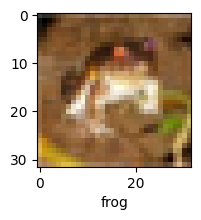

In [11]:
plot_sample(X_train, y_train, 0)

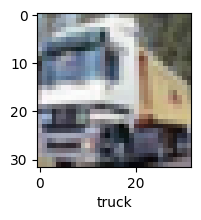

In [12]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 93ms/step - accuracy: 0.3048 - loss: 1.9300
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 96ms/step - accuracy: 0.4217 - loss: 1.6380
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 96ms/step - accuracy: 0.4524 - loss: 1.5524
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 99ms/step - accuracy: 0.4745 - loss: 1.4877
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 96ms/step - accuracy: 0.4957 - loss: 1.4326


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.56      0.56      1000
           1       0.60      0.63      0.62      1000
           2       0.34      0.47      0.39      1000
           3       0.38      0.32      0.35      1000
           4       0.47      0.29      0.36      1000
           5       0.52      0.25      0.34      1000
           6       0.45      0.68      0.54      1000
           7       0.61      0.49      0.54      1000
           8       0.64      0.64      0.64      1000
           9       0.49      0.66      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.49     10000
weighted avg       0.51      0.50      0.49     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [23]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
 230/1563 ━━━━━━━━━━━━━━━━━━━━ 1:08 52ms/step - accuracy: 0.3322 - loss: 1.8367

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [21]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7056 - loss: 0.9307


[0.951980471611023, 0.699400007724762]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


array([[4.91426734e-04, 1.25865359e-03, 7.78676476e-03, 7.47818232e-01,
        6.67765364e-03, 1.58685073e-01, 5.73817119e-02, 1.42930504e-02,
        4.70384629e-03, 9.03539418e-04],
       [1.25394166e-02, 3.66918817e-02, 1.67290455e-05, 2.08116944e-05,
        2.90771550e-06, 8.23965456e-06, 1.38865937e-06, 2.64258506e-05,
        9.41401660e-01, 9.29053407e-03],
       [2.04181280e-02, 6.62935525e-03, 1.53395196e-03, 1.22217853e-02,
        1.35176757e-03, 2.88814539e-03, 1.10613671e-03, 3.26818274e-03,
        9.02536929e-01, 4.80455793e-02],
       [7.23290563e-01, 3.14566656e-03, 3.94689757e-03, 5.30816382e-03,
        2.94622779e-03, 7.93193758e-04, 1.14463118e-03, 7.04652048e-04,
        2.55103141e-01, 3.61676654e-03],
       [8.55654946e-07, 6.56600832e-06, 3.88681423e-03, 1.32452315e-02,
        3.44222158e-01, 3.22942709e-04, 6.38235271e-01, 7.75975132e-05,
        2.07650214e-06, 5.23991048e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

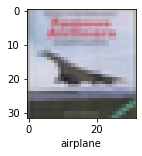

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'ship'

In [ ]:
classes[y_classes[3]]

'ship'

<h3 style='color:purple'>Exercise</h3>

Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference:
https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/1_digits_recognition/digits_recognition_neural_network.ipynb

Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. Once you have worked on this problem on your own, you can check my solution by clicking on this link: [Solution](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/16_cnn_cifar10_small_image_classification/cnn_mnist_exercise_solution.ipynb)